In [66]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [67]:
d_p = 64
d_V = 64
epochs = 100


In [68]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(d_p,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(d_p, activation='relu'),
])

In [69]:
folder_path = "data/test_data/big_dataset_deeponet/heat2d/"

In [70]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

INFO:sciml.model.deeponet.deeponet:Model initialized with 100 epochs, 32 batch size, 0.001 learning rate


In [71]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 32/32 [00:00<00:00, 5235.93it/s]


In [72]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(32, 64)
(32, 2560, 3)
(32, 2560)


In [73]:
train_history = model.fit()

Training progress:   0%|          | 0/100 [00:00<?, ?it/s]2025-03-16 20:12:45.708710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,2560]
	 [[{{node Placeholder/_2}}]]
INFO:sciml.model.deeponet.deeponet:Epoch 0 completed
Training progress:   1%|          | 1/100 [00:00<00:11,  8.43it/s]INFO:sciml.model.deeponet.deeponet:Epoch 1 completed
INFO:sciml.model.deeponet.deeponet:Epoch 2 completed
Training progress:   3%|▎         | 3/100 [00:00<00:09, 10.37it/s]INFO:sciml.model.deeponet.deeponet:Epoch 3 completed
INFO:sciml.model.deeponet.deeponet:Epoch 4 completed
Training progress:   5%|▌         | 5/100 [00:00<00:08, 10.94it/s]INFO:sciml.model.deeponet.deeponet:Epoch 5 completed
INFO:sciml.model.deeponet.deeponet:Epoch 6 completed
Training progress:   7%|▋  

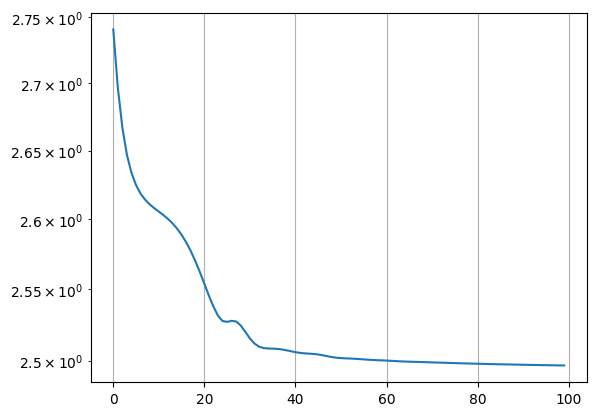

In [74]:
plt.plot(train_history[::(32//32)])
#log 
plt.yscale('log')
plt.grid()
plt.show()